# Graphs

we use the libraries

matplotlib a seaborn

and store the figures using PdfPages.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cx_Oracle
import json
from matplotlib.backends.backend_pdf import PdfPages
import os
import functools  #reduce

max_movieid=100
max_userid=100

In [2]:
cx_Oracle.init_oracle_client(config_dir="C:\\Users\\marta\\Desktop\\Plocha\\programy\\instantclient_21_8")



In [3]:
fig_file = 'figures/my_figures.pdf'
try:
    os.remove(fig_file)
except OSError:
    pass

pp = PdfPages(fig_file)


## Merge tables MOVIES, RATINGS, IMDB

pd.merge()

In [4]:
try:
    connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
    movies=pd.read_sql_query('select MOVIEID,TITLE,GENRE,TT from MMOVIES WHERE MOVIEID>3 AND MOVIEID<{}'.format(max_movieid),
                         connection,
                         index_col='MOVIEID')
    ratings=pd.read_sql_query('''select MOVIEID,USERID,RATING,DT,DTYY,DTMM,DTDW,DTHH from MRATINGS 
                            WHERE MOVIEID<{} AND USERID<{}
                            ORDER BY MOVIEID, USERID
'''.format(max_movieid,max_userid)
                          ,connection,index_col=['MOVIEID','USERID'])
    rats=pd.merge(ratings, movies, how='inner', on="MOVIEID")#, right_index=True)
    imdb=pd.read_sql_query('select TT,NAME,RATING as IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR from IMDB',connection)
    rats.reset_index(inplace=True)
    rats=pd.merge(rats,imdb, how='left',on='TT')
except:
    rats= pd.read_json('data/rats.json')
    
rats.head(2)

C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,MOVIEID,RATING,DT,DTYY,DTMM,DTDW,DTHH,TITLE,GENRE,TT,NAME,IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR
0,4,2.0,2000-02-27 23:29:58,2000,2,1,23,Waiting to Exhale (1995),Comedy|Drama|Romance\r,tt0114885,Waiting to Exhale,5.6,R,NaN,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",English,1995
1,4,3.0,2007-12-07 23:00:09,2007,12,6,23,Waiting to Exhale (1995),Comedy|Drama|Romance\r,tt0114885,Waiting to Exhale,5.6,R,NaN,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",English,1995


# Histogram

hist is the simplest way. I prefer the manual construction later.

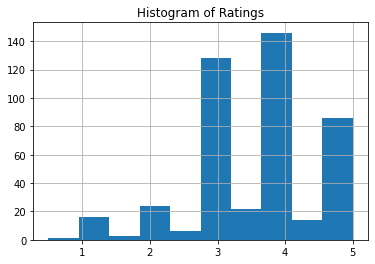

In [5]:
p=rats['RATING'].hist()
plt.title('Histogram of Ratings')
plt.show()

## Histogram by numpy

In [6]:
my_hist=np.histogram(rats['RATING'],bins=9) #9 přihrádek
my_hist

(array([  1,  16,   3,  24,   6, 128,  22, 146, 100], dtype=int64),
 array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

In [7]:
my_hist[1][1:] # to omit the lowest bin edge

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

### set if  RATING values

and 'bins' from the set. Shift the values up and add a zero at the begining.

set, list, sort

In [8]:
rat_values=list(set(rats['RATING']))
rat_values.sort()
bb=[0]+[i+0.1 for i in rat_values]
bb

[0, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]

In [9]:
my_hist=np.histogram(rats['RATING'],bins=bb) 
my_hist

(array([  1,  16,   3,  24,   6, 128,  22, 146,  14,  86], dtype=int64),
 array([0. , 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]))

## Simplest graphs

### plot

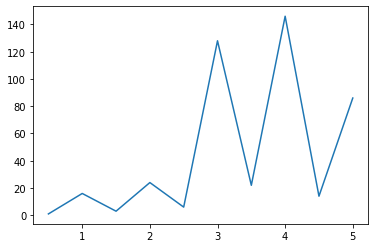

In [10]:
plt.plot(rat_values,my_hist[0])
plt.show()

### bar

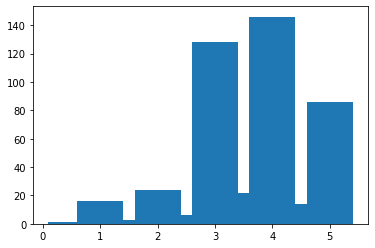

In [11]:
plt.bar(rat_values,my_hist[0])
plt.show()

## Titles, labels, saving to the pdf

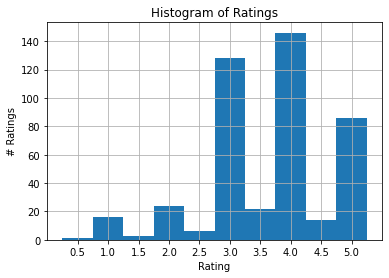

In [12]:
plt.bar(rat_values,my_hist[0],width=0.5)
plt.xticks(rat_values)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('# Ratings')
plt.grid(True)
#one figure
plt.savefig('my_figure.pdf')
#multiple figures 
plt.savefig(pp, format='pdf')
plt.show()

## Genre histogram


###  A movie may belong to more genres

a list joined by | .


In [13]:
rats.GENRE.head(2)

0    Comedy|Drama|Romance\r
1    Comedy|Drama|Romance\r
Name: GENRE, dtype: object

### A tricky function to get the list of genres ;-)

In [14]:
sets=[set(u[:-1].split('|')) for u in rats.GENRE]
functools.reduce(lambda x,y:x.union(y),sets)

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War'}

## New column definition for the dataFrame

the column COMEDY takes boolean values, True iff the movie is a Comedy

where.find(what) searches $what$ in $where$, it is applied to each value in the Series.

In [15]:
rats['COMEDY']=[a.find('Comedy')>-1 for a in rats.GENRE]
rats['ACTION']=[a.find('Action')>-1 for a in rats.GENRE]
rats['DRAMA']=[a.find('Drama')>-1 for a in rats.GENRE]

## Histogram of three genres in one graph

first, the histogram of ACTION movies

In [16]:
np.histogram(rats['RATING'][rats.ACTION],bins=bb)

(array([ 0,  3,  2,  6,  1, 29,  1, 29,  1,  7], dtype=int64),
 array([0. , 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]))

### More histograms in one graph

alpha - transparency

label - the label in the legend

legend - displayes the legend

color 

rotation - rotate x labels

we move the x values little bit to the left/right in the second/third graph. 

 'tex' syntax in the labels, an arrow just for fun.

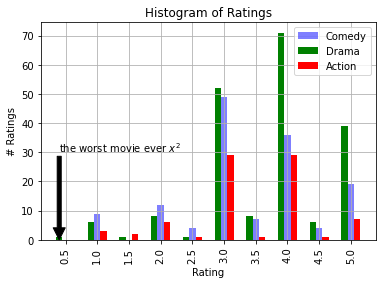

In [17]:
plt.bar(rat_values,np.histogram(rats['RATING'][rats.COMEDY],bins=bb)[0],
        width=0.1,alpha=0.5,color='blue',label='Comedy')
plt.bar([(i-0.1) for i in rat_values],   #posunu x trochu doleva
        np.histogram(rats['RATING'][rats.DRAMA],bins=bb)[0],
        color='green',width=0.1,label='Drama')
plt.bar([(i+0.1) for i in rat_values],
        np.histogram(rats['RATING'][rats.ACTION],bins=bb)[0],
        color='red',width=0.1,label='Action')
plt.xticks(rat_values)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('# Ratings')
plt.legend()
plt.tick_params(axis="x", rotation=90)
plt.grid(True)
plt.savefig(pp, format='pdf')
plt.annotate('the worst movie ever $x^2$', xy=(0.4, 0), xytext=(0.4, 30),
             arrowprops=dict(facecolor='black'),
             )
plt.show()


## Percent - the division of series divides appropriate coordinates (broadcasting)

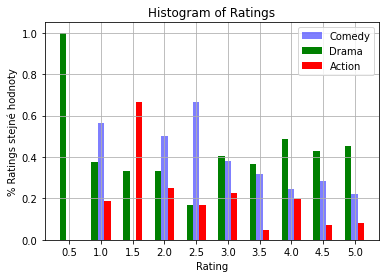

In [18]:
plt.bar(rat_values,np.histogram(rats['RATING'][rats.COMEDY],bins=bb)[0]/my_hist[0],
        width=0.1,alpha=0.5,color='blue',label='Comedy')
plt.bar([(i-0.1) for i in rat_values],np.histogram(rats['RATING'][rats.DRAMA],bins=bb)[0]/my_hist[0]
        ,color='green',width=0.1,label='Drama')
plt.bar([(i+0.1) for i in rat_values],np.histogram(rats['RATING'][rats.ACTION],bins=bb)[0]/my_hist[0]
        ,color='red',width=0.1,label='Action')
plt.xticks(rat_values)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('% Ratings stejné hodnoty')
plt.legend()
plt.grid(True)
plt.show()

## Stacked histograms

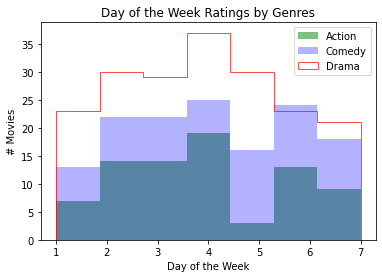

In [19]:

a=plt.hist(rats[rats.ACTION].DTDW,  bins=7,  alpha=0.5, 
         histtype='stepfilled', color='green',label='Action',
         edgecolor='none')
b=plt.hist(rats[rats.COMEDY].DTDW, bins=7,   alpha=0.3,
         histtype='stepfilled', color='blue',label='Comedy'
          )
c=plt.hist(rats[rats.DRAMA].DTDW, bins=7,  alpha=0.7,
         histtype='step', color='red',label='Drama'
          )
plt.legend()
plt.grid(False)
plt.title('Day of the Week Ratings by Genres')
plt.xlabel('Day of the Week')
plt.ylabel('# Movies')

plt.show()

# Subplots


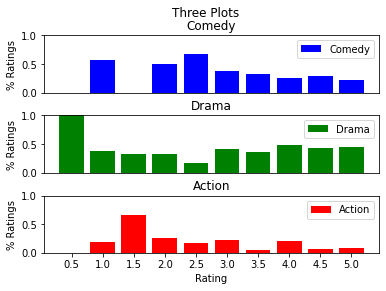

In [20]:
def ukaz(ax,condition,text, color):
    plt.title(text)
    plt.bar(rat_values,np.histogram(rats['RATING'][condition],bins=bb)[0]/my_hist[0],
            color=color,width=0.4,label=text)
    plt.xticks([])
    plt.ylim([0,1])
    plt.legend()
    plt.ylabel('% Ratings')

fig, ax_lst = plt.subplots(3, 1)  # 3 rows, 1 column; numbered row-wise
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Three Plots')  # Add a title so we know which it is
sub1=plt.subplot(311)
ukaz(plt, rats.COMEDY,'Comedy','blue')
ax2=plt.subplot(312)
ukaz(plt, rats.DRAMA,'Drama','green')
plt.subplot(313)
ukaz(plt, rats.ACTION,'Action','red')
plt.xticks(rat_values)
plt.xlabel('Rating')
plt.savefig(pp, format='pdf')
plt.show()


## Sharey share an axis

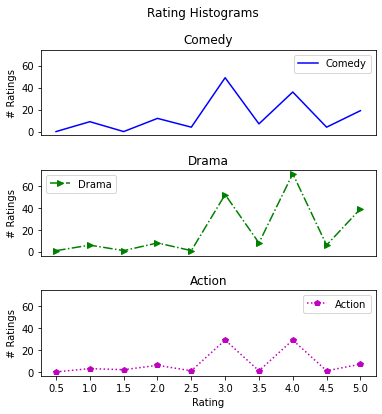

In [21]:
def ukaz(plt,condition,text, fmt):
    plt.title(text)
    ax=plt.plot(rat_values,np.histogram(rats['RATING'][condition],bins=bb)[0],
            fmt,label=text)
    plt.xticks([])
    plt.legend()
    plt.ylabel('# Ratings')
    return(ax)

fig, ax_lst = plt.subplots(3, 1, figsize=(6, 6))  # 3 rows, 1 column; numbered row-wise
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Rating Histograms')  # Add a title so we know which it is

ax1=plt.subplot(311)
aa=ukaz(plt, rats.COMEDY,'Comedy','-b')

plt.subplot(312, sharey=ax1)
ukaz(plt, rats.DRAMA,'Drama','>-.g')

plt.subplot(313, sharey=ax1)
ukaz(plt, rats.ACTION,'Action','p:m')

plt.xticks(rat_values)
plt.xlabel('Rating')
plt.savefig(pp, format='pdf')
plt.show()


Format: marker,line,color
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

# Scatter plot

plot, but also the color and the size 'coordinates'


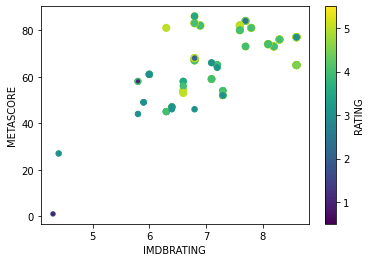

In [22]:
plt.scatter(rats.IMDBRATING,rats.METASCORE, c=rats.RATING,s=rats.RATING*10)
plt.xlabel('IMDBRATING')
plt.ylabel('METASCORE')
cbar=plt.colorbar(ticks=range(6))
plt.clim(0.5, 5.5)
cbar.set_label('RATING', rotation=90)
plt.show()

### Simple plot

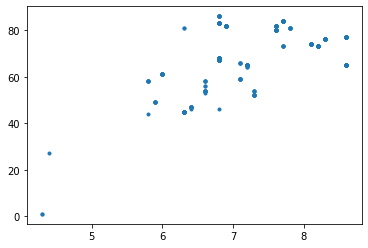

In [23]:
plt.plot(np.array(rats.IMDBRATING),np.array(rats.METASCORE),'.')
plt.show()

# Boxplot: 
median, 1. and 3. quantile, 5 and 95%, outliers

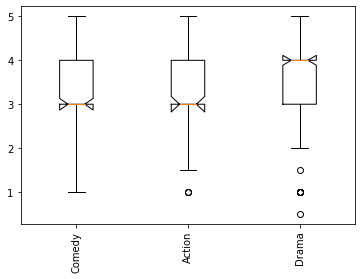

In [24]:
nic=plt.boxplot(np.array([rats[rats.COMEDY].RATING,rats[rats.ACTION].RATING,rats[rats.DRAMA].RATING],dtype=object),
                notch=True,
                whis=(5, 95))
plt.xticks([ 1, 2,3], ['Comedy','Action','Drama'],rotation=90)
plt.grid(False)
plt.show()

# Seaborn

another graphical library

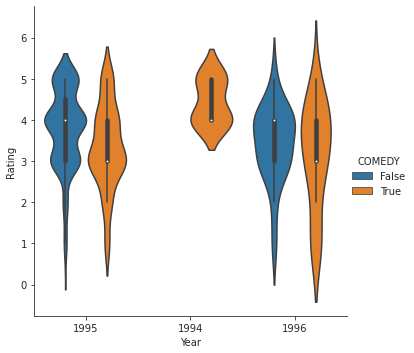

In [25]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#sns.set()
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='YEAR',y='RATING',hue='COMEDY',data=rats, kind="violin")
    g.set_axis_labels("Year", "Rating")
plt.show()

# Pairplot 

the first look at the continuous variables

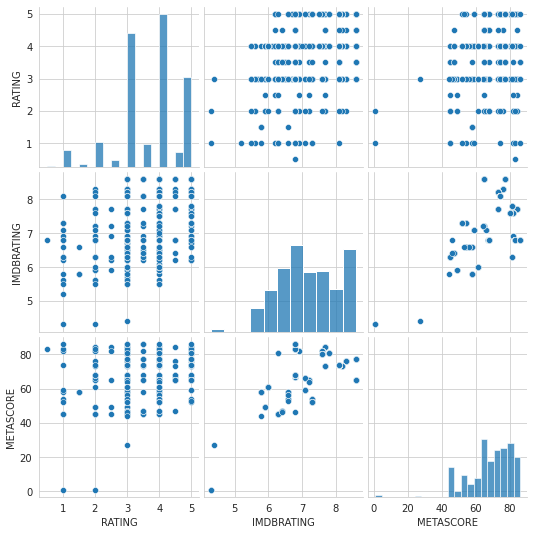

In [26]:
with sns.axes_style(style='whitegrid'):#{darkgrid, whitegrid, dark, white, ticks}
    sns.pairplot(rats[['RATING','IMDBRATING','METASCORE']], height=2.5)
plt.show()

## 2D probability density

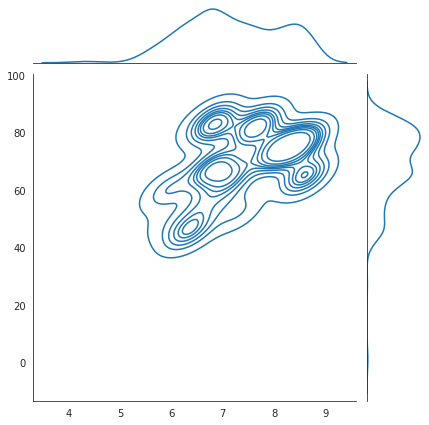

In [27]:
with sns.axes_style('white'):
    sns.jointplot(x=np.array(rats.IMDBRATING),y=np.array(rats.METASCORE),  kind='kde');
plt.show()

## Czech Statistical Office histogram

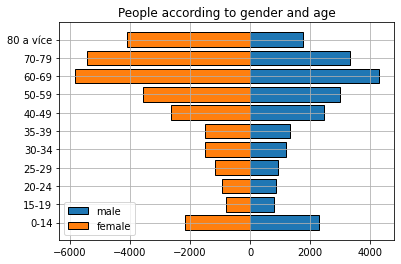

In [28]:
my_data=pd.DataFrame({
  'age':['0-14','15-19','20-24','25-29','30-34','35-39','40-49','50-59','60-69','70-79','80 a více'],
  'male':[2299,784,854,927,1197,1329,2443,3003,4289,3322,1747],
  'female':[2159,814,950,1153,1494,1505,2627,3571,5837,5413,4094] 
})

# plot
plt.barh(range(11), my_data['male'],  edgecolor='black',label='male')
plt.barh(range(11), -my_data['female'],  edgecolor='black',label='female')
plt.yticks(range(11), my_data['age'])
# show the graph
plt.legend()
plt.grid()
plt.title('People according to gender and age')
plt.show()

In [29]:
## further hints
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cx_Oracle
import json
from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages('figures/my_figures.pdf')

import functools  #reduce


In [30]:
try:
    connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
    movies=pd.read_sql_query('select MOVIEID,TITLE,TT from FMOVIES'.format(max_movieid),
                         connection,
                         index_col='MOVIEID')
    ratings=pd.read_sql_query('''select MOVIEID,USERID,RATING,DT,DTYY,DTMM,DTDW,DTHH from FRATINGS 
                            WHERE USERID<10000
                            ORDER BY MOVIEID, USERID
'''.format(max_movieid,max_userid)
                          ,connection,index_col=['MOVIEID','USERID'])
    rats=pd.merge(ratings, movies, how='inner', on="MOVIEID")#, right_index=True)
    imdb=pd.read_sql_query('select TT,NAME,RATING as IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR from IMDB',connection)
    rats.reset_index(inplace=True)
    rats=pd.merge(rats,imdb, how='left',on='TT')
except:
    print('Reading from the file.')
    rats= pd.read_json('frats.json')
    
rats.head(1)

,MOVIEID,RATING,DT,DTYY,DTMM,DTDW,DTHH,TITLE,TT,NAME,IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR
0,1,5,2005-08-17,2005,8,4,0,Dinosaur Planet,tt0389605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
lang=rats.groupby('LANGUAGE')['RATING'].count()
lang[lang>700]

LANGUAGE
English                                        182540
English, American Sign Language                  1058
English, Arabic                                  1606
English, Cantonese, Mandarin                      852
English, French                                 11510
English, French, Italian                         1190
English, French, Spanish                         1881
English, German                                  3675
English, German, Italian                          881
English, Italian                                 5089
English, Japanese                                1866
English, Japanese, French                        1184
English, Japanese, French, Arabic, Spanish        718
English, Japanese, German, French                 801
English, Latin                                   2106
English, Mandarin                                1252
English, Portuguese                              1156
English, Russian                                 4273
English, Russian, F

In [32]:
for director in ['Bryan Singer','David Fincher','Terry Gilliam']+['Richard Donner', 'Steven Spielberg', 'Tony Scott'] :
    print(rats[rats.DIRECTOR==director]['RATING'].count())

758
1181
366
2559
5292
2633


## Secondary axis and its label

Text(0, 0.5, 'twice')

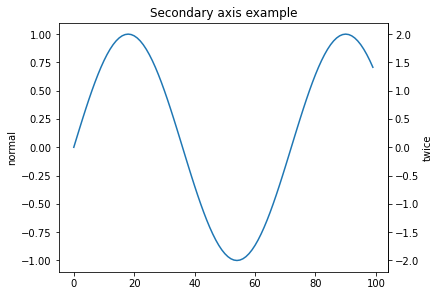

In [33]:
fig, ax = plt.subplots(constrained_layout=True)

x=np.arange(0,100)
y=np.sin(5*x*np.pi/180)

ax.plot(x,y)
ax.set_ylabel('normal')
ax.set_title('Secondary axis example')    
def twice(x):
    return(x*2)
def half(x):
    return(x/2)
secax = ax.secondary_yaxis('right', functions=(twice, half))
secax.set_ylabel('twice')


## Read a csv

In [34]:
hospit=pd.read_csv('data/hospitalizace.csv')
hospit.head(1)

,datum,pacient_prvni_zaznam,kum_pacient_prvni_zaznam,pocet_hosp,stav_bez_priznaku,stav_lehky,stav_stredni,stav_tezky,jip,kyslik,hfno,upv,ecmo,tezky_upv_ecmo,umrti,kum_umrti
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Close the *.pdf file with figures.

In [35]:
sns.axes_style(style='white')
pp.close() #stop saving

https://seaborn.pydata.org/introduction.html

# Tasks

1. Place your files into c:\Users\student\Oracle\seminardm
    there are Oracle libraries to connect to the database
3. Open Jupyter notebook
4. Select either 'movies' or 'CSU'  https://vdb.czso.cz/vdbvo2/faces/index.jsf?page=statistiky#katalog=30261 task that follows.
4. Show data in graphs.
5. Submit the notebook to
https://gitlab.mff.cuni.cz/martav/seminardm/sem2

## Movie tasks - Flix data, FRATINGS, FMOVIES, IMDB

1. Show the histogram of Netflix ratings. (frats.json file)
3. Histogram of rating for each year.
2. Show histograms of English, French, Spanish LANGUAGE movies.
3. Rating histogram for the director in ['Richard Donner', 'Steven Spielberg', 'Tony Scott'] (for Netflix).   
&nbsp;&nbsp;&nbsp;&nbsp;For Movielense ['Bryan Singer','David Fincher','Terry Gilliam'].
5. Submit the notebook to
https://gitlab.mff.cuni.cz/martav/seminardm/sem2
